# reference: https://www.kaggle.com/archaeocharlie/a-beginner-s-approach-to-classification
# sklearn , svm, mnist

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
from copy import deepcopy
%matplotlib inline

In [2]:
labeled_images = pd.read_csv('train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, train_size=0.8, random_state=0)

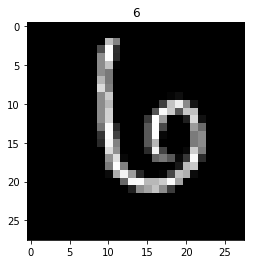

In [3]:
view_img = train_images.iloc[1].as_matrix()
view_img = view_img.reshape((28,28))
plt.imshow(view_img, cmap='gray')
plt.title(train_labels.iloc[1,0])

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

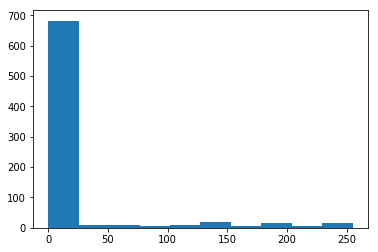

In [4]:
plt.hist(train_images.iloc[1])

In [5]:
clf = svm.SVC()
clf.fit (train_images, train_labels.values.ravel())
clf.score (test_images, test_labels)

0.10000000000000001

# Oops, the 10% accuracy is terrible.

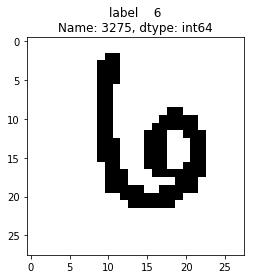

In [7]:
test_images_bin = test_images>0
train_images_bin = train_images>0

view_image = train_images_bin.iloc[1].as_matrix().reshape((28,28))
plt.imshow(view_image, cmap='binary')
plt.title(train_labels.iloc[1])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

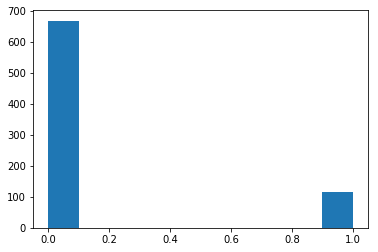

In [8]:
plt.hist(train_images_bin.iloc[1])

In [9]:
clf = svm.SVC()
clf.fit (train_images_bin, train_labels.values.ravel())
clf.score(test_images_bin, test_labels)

0.88700000000000001

In [10]:
clf.predict(test_images_bin)

array([9, 7, 6, 9, 2, 7, 8, 1, 4, 2, 8, 2, 5, 3, 2, 5, 9, 0, 3, 5, 6, 0, 4,
       6, 5, 8, 3, 5, 2, 3, 2, 5, 0, 0, 5, 4, 0, 7, 1, 2, 9, 4, 3, 2, 1, 4,
       0, 0, 4, 8, 5, 0, 1, 6, 5, 8, 5, 9, 4, 3, 9, 0, 4, 0, 1, 2, 5, 0, 1,
       3, 5, 2, 8, 1, 2, 0, 1, 7, 9, 9, 8, 7, 7, 7, 5, 0, 7, 9, 1, 5, 4, 7,
       9, 0, 4, 7, 2, 2, 9, 7, 5, 2, 2, 6, 0, 9, 8, 9, 3, 1, 9, 4, 0, 6, 8,
       9, 6, 9, 0, 2, 9, 9, 2, 6, 7, 1, 8, 5, 5, 8, 7, 8, 2, 7, 4, 8, 6, 9,
       2, 7, 4, 3, 1, 4, 9, 5, 8, 9, 9, 2, 5, 1, 6, 3, 2, 8, 9, 6, 4, 2, 3,
       5, 4, 7, 7, 9, 2, 8, 9, 9, 1, 8, 4, 9, 4, 0, 5, 6, 8, 4, 3, 4, 0, 3,
       6, 2, 4, 1, 5, 0, 6, 6, 4, 0, 8, 4, 5, 4, 7, 2, 7, 2, 3, 6, 0, 4, 2,
       3, 0, 9, 9, 1, 7, 2, 1, 4, 6, 1, 4, 8, 2, 6, 3, 2, 0, 7, 0, 0, 6, 0,
       1, 4, 5, 1, 4, 3, 1, 6, 3, 2, 1, 8, 1, 1, 2, 5, 5, 0, 4, 9, 1, 1, 2,
       7, 7, 3, 1, 9, 6, 2, 8, 6, 7, 6, 5, 6, 8, 0, 1, 3, 4, 7, 1, 7, 2, 6,
       9, 9, 7, 8, 1, 1, 4, 9, 5, 6, 9, 4, 2, 8, 7, 7, 4, 9, 3, 4, 1, 3, 6,
       0, 3,

In [11]:
train_images.iloc[0].values.max()

255

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

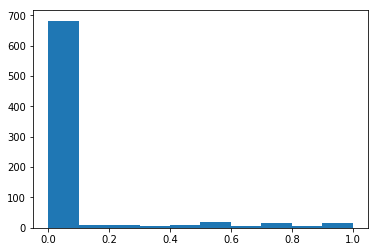

In [12]:
train_images_normalize = train_images / 255
test_images_normalize = test_images / 255

plt.hist(train_images_normalize.iloc[1])

In [13]:
clf = svm.SVC()
clf.fit(train_images_normalize, train_labels.values.ravel())
clf.score(test_images_normalize, test_labels)

0.88300000000000001

# labeling test data

In [18]:
test_data = pd.read_csv('test.csv')
test_data_normalize = test_data / 255
results = clf.predict(test_data_normalize[0:5000])

print(results)

df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)

[2 0 9 ..., 1 7 3]
